# Read the Stocks Data

In [7]:
# import packages
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

# read "S01 data.csv"
df = pd.read_csv('S01 data.csv')
df.info()
df.head()
df.columns
df

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 124 entries, 0 to 123
Data columns (total 14 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   gvkey     124 non-null    int64  
 1   datadate  124 non-null    int64  
 2   fyear     124 non-null    int64  
 3   indfmt    124 non-null    object 
 4   consol    124 non-null    object 
 5   popsrc    124 non-null    object 
 6   datafmt   124 non-null    object 
 7   tic       124 non-null    object 
 8   curcd     124 non-null    object 
 9   cogs      124 non-null    float64
 10  ni        124 non-null    float64
 11  revt      124 non-null    float64
 12  costat    124 non-null    object 
 13  naics     124 non-null    int64  
dtypes: float64(3), int64(4), object(7)
memory usage: 13.7+ KB


,gvkey,datadate,fyear,indfmt,consol,popsrc,datafmt,tic,curcd,cogs,ni,revt,costat,naics
0,1690,20100930,2010,INDL,C,D,STD,AAPL,USD,38609.000,14013.000,65225.000,A,334220
1,1690,20110930,2011,INDL,C,D,STD,AAPL,USD,62609.000,25922.000,108249.000,A,334220
2,1690,20120930,2012,INDL,C,D,STD,AAPL,USD,84641.000,41733.000,156508.000,A,334220
3,1690,20130930,2013,INDL,C,D,STD,AAPL,USD,99849.000,37037.000,170910.000,A,334220
4,1690,20140930,2014,INDL,C,D,STD,AAPL,USD,104312.000,39510.000,182795.000,A,334220
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
119,184996,20171231,2017,INDL,C,D,STD,TSLA,USD,7900.261,-1961.400,11758.751,A,336111
120,184996,20181231,2018,INDL,C,D,STD,TSLA,USD,15531.461,-976.091,21461.268,A,336111
121,184996,20191231,2019,INDL,C,D,STD,TSLA,USD,18402.000,-862.000,24578.000,A,336111
122,184996,20201231,2020,INDL,C,D,STD,TSLA,USD,22351.000,721.000,31536.000,A,336111


In [8]:
df['datadate'] = pd.to_datetime(df['datadate'], format='%Y%m%d')  



In [9]:
df = pd.read_csv('S01 data.csv', index_col = 'datadate', parse_dates = True)
df

,gvkey,fyear,indfmt,consol,popsrc,datafmt,tic,curcd,cogs,ni,revt,costat,naics
datadate,,,,,,,,,,,,,
2010-09-30,1690,2010,INDL,C,D,STD,AAPL,USD,38609.000,14013.000,65225.000,A,334220
2011-09-30,1690,2011,INDL,C,D,STD,AAPL,USD,62609.000,25922.000,108249.000,A,334220
2012-09-30,1690,2012,INDL,C,D,STD,AAPL,USD,84641.000,41733.000,156508.000,A,334220
2013-09-30,1690,2013,INDL,C,D,STD,AAPL,USD,99849.000,37037.000,170910.000,A,334220
2014-09-30,1690,2014,INDL,C,D,STD,AAPL,USD,104312.000,39510.000,182795.000,A,334220
...,...,...,...,...,...,...,...,...,...,...,...,...,...
2017-12-31,184996,2017,INDL,C,D,STD,TSLA,USD,7900.261,-1961.400,11758.751,A,336111
2018-12-31,184996,2018,INDL,C,D,STD,TSLA,USD,15531.461,-976.091,21461.268,A,336111
2019-12-31,184996,2019,INDL,C,D,STD,TSLA,USD,18402.000,-862.000,24578.000,A,336111


# Pivot table of 'revt' revenue of stock and date

In [10]:
rev = pd.pivot_table(df, values = 'revt', index = 'datadate', columns = 'tic')
rev.head()


# Easier to analyze the data.
rev_annual = rev.ffill().resample('Y').last()       # resampling -> change the data frequency.
rev_annual.info()
rev_annual.describe()
rev_annual.describe().round(1)      # too many zeros
rev_annual.describe().astype(int)   # integer looks great for sales.


# cutomized description; compute what you want only
rev_annual.mean()
rev_annual.aggregate([min, np.mean, np.median, max]).round(1)


<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 13 entries, 2010-12-31 to 2022-12-31
Freq: A-DEC
Data columns (total 10 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   AAPL    13 non-null     float64
 1   AMZN    13 non-null     float64
 2   BKNG    13 non-null     float64
 3   COST    13 non-null     float64
 4   CSX     13 non-null     float64
 5   GOOGL   13 non-null     float64
 6   IBM     13 non-null     float64
 7   MSFT    13 non-null     float64
 8   TSLA    13 non-null     float64
 9   WMT     13 non-null     float64
dtypes: float64(10)
memory usage: 1.1 KB


tic,AAPL,AMZN,BKNG,COST,CSX,GOOGL,IBM,MSFT,TSLA,WMT
min,65225.0,34204.0,3084.9,77946.0,10583.0,29321.0,57350.0,62484.0,116.7,406103.0
mean,224763.1,197445.4,9148.8,133204.6,11764.0,116601.5,83822.8,106528.9,16459.4,485771.5
median,229234.0,135987.0,9224.0,118719.0,11811.0,90272.0,79920.0,89950.0,7000.1,482154.0
max,394328.0,469822.0,15066.0,226954.0,12669.0,257637.0,106916.0,198270.0,53823.0,569962.0


<AxesSubplot:xlabel='datadate'>

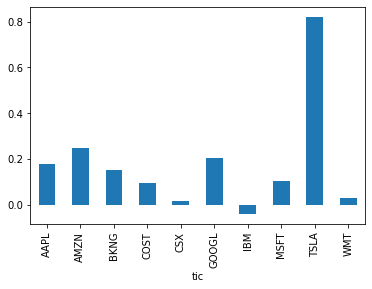

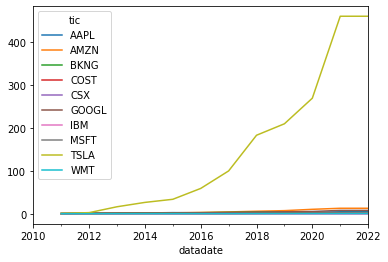

In [11]:
rev_annual.diff().round(1)   # absolute change
rev_annual.diff().mean().round(1)

rtns = rev_annual.pct_change().round(3)   # percentage change
rev_annual.pct_change().mean().round(3).plot(kind = 'bar')


# alternative way: by shifting data
# difference
rev_annual.iloc[1:] - rev_annual.shift(1).iloc[1:]
rev_annual.iloc[1:].subtract(rev_annual.shift(1).iloc[1:])
# pct change
rev_annual.iloc[1:].div(rev_annual.shift(1).iloc[1:]).subtract(1).round(3)


# cumulative returns
cumrtns = (rtns + 1).cumprod() - 1

# Continuous compounding return
rtns = np.log(rev_annual / rev_annual.shift(1))
np.exp(rtns.cumsum()).plot()

<AxesSubplot:xlabel='caldt'>

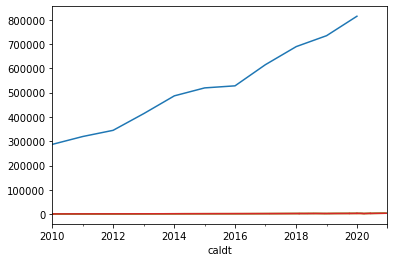

In [12]:

df_sp500 = pd.read_csv('S&P500 index daily.csv', index_col = 0, parse_dates = True)
df_sp500.head()
df_sp500.shape

sp500_monthly = df_sp500.resample('M').last()
sp500_monthly.head()

sp500_weekly = df_sp500.resample('W').last()
sp500_weekly.head()

sp500_annual = df_sp500.resample('Y').last()
sp500_annual.head()

sp500_annual = df_sp500.resample('Y').first()
sp500_annual.head()

sp500_annual = df_sp500.resample('Y').mean()
sp500_annual

sp500_annual = df_sp500.resample('Y').sum()
sp500_annual

sp500_annual['spindx'].plot()
sp500_monthly['spindx'].plot()
sp500_weekly['spindx'].plot()
df_sp500['spindx'].plot()

# Rolling statistics - 20 Days moving average

In [14]:
sp500idx = pd.DataFrame(df_sp500['spindx'])
sp500idx['mean'] = sp500idx['spindx'].rolling(20).mean()  # 20 day moving average
sp500idx['median'] = sp500idx['spindx'].rolling(20).median()
sp500idx['std'] = sp500idx['spindx'].rolling(20).std()

sp500idx['product'] = sp500idx['spindx'].rolling(20).apply(np.prod)
sp500idx['max'] = sp500idx['spindx'].rolling(20).max()
sp500idx['min'] = sp500idx['spindx'].rolling(20).min()
sp500idx['mean'].head(30)

caldt
2010-01-04          NaN
2010-01-05          NaN
2010-01-06          NaN
2010-01-07          NaN
2010-01-08          NaN
2010-01-11          NaN
2010-01-12          NaN
2010-01-13          NaN
2010-01-14          NaN
2010-01-15          NaN
2010-01-19          NaN
2010-01-20          NaN
2010-01-21          NaN
2010-01-22          NaN
2010-01-25          NaN
2010-01-26          NaN
2010-01-27          NaN
2010-01-28          NaN
2010-01-29          NaN
2010-02-01    1121.8620
2010-02-02    1120.3785
2010-02-03    1118.4165
2010-02-04    1114.7150
2010-02-05    1110.9400
2010-02-08    1106.5280
2010-02-09    1102.7050
2010-02-10    1099.3005
2010-02-11    1095.9400
2010-02-12    1092.2925
2010-02-16    1090.2345
Name: mean, dtype: float64

# Exponential weighted moving average

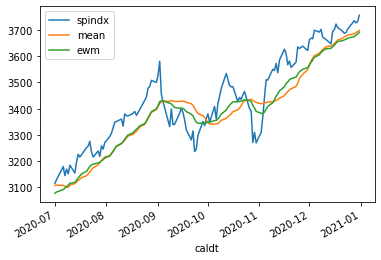

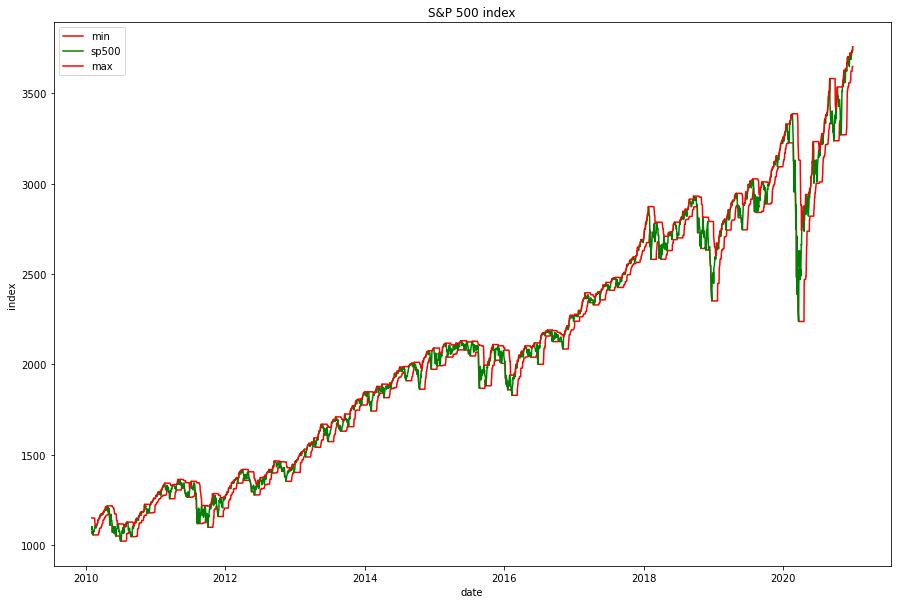

In [15]:
sp500idx['ewm'] = sp500idx['spindx'].ewm(span = 20, min_periods = 20).mean() 
sp500idx.loc['2020-07-01':'2020-12-31',['spindx', 'mean', 'ewm']].plot()

sp500idx = sp500idx.dropna()

# plot of sp500, max, min
plt.figure(figsize = (15, 10))
plt.plot(sp500idx['min'], 'r', lw = 1.5, label = 'min')
plt.plot(sp500idx['spindx'], 'g', lw = 1.5, label = 'sp500')
plt.plot(sp500idx['max'], 'r', lw = 1.5, label = 'max')
plt.legend(loc = 0)
plt.xlabel('date')
plt.ylabel('index')
plt.title('S&P 500 index')
plt.show()

In [18]:
r_f = 0.02
r_sp500 = sp500idx['spindx'].pct_change()
roll_mean = r_sp500.rolling(20).mean()
roll_std = r_sp500.rolling(20).std()
sharpe_sp500 = (roll_mean - r_f) /  roll_std
sharpe_sp500.dropna(inplace = True)
sharpe_sp500.head()

# or we can define sharpe ratio function and use rolling method directly.
def sharpe(X, rf = r_f):
    mean = X.mean()
    std = X.std()
    return (mean - rf)/std


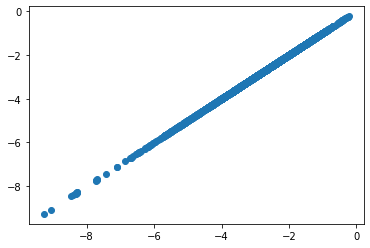

In [19]:

sharpe_sp500_v2 = r_sp500.rolling(20).apply(sharpe).dropna()
sharpe_sp500_v2.head()

plt.scatter(sharpe_sp500, sharpe_sp500_v2)

# Trading strategy

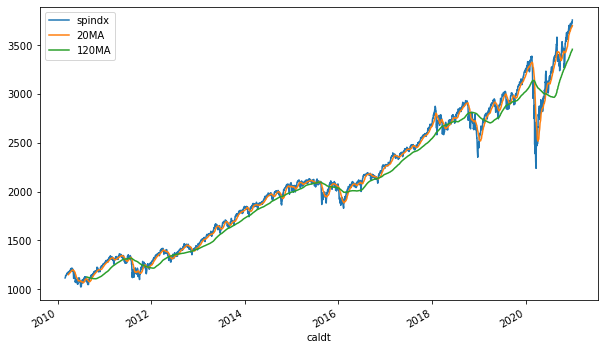

In [20]:
sp500idx['20MA'] = sp500idx['spindx'].rolling(20).mean()
sp500idx['120MA'] = sp500idx['spindx'].rolling(120).mean()
sp500idx[['spindx', '20MA', '120MA']].head()
sp500idx[['spindx', '20MA', '120MA']].tail()

sp500idx[['spindx', '20MA', '120MA']].plot(figsize=(10, 6))
sp500trading = sp500idx[['spindx', '20MA', '120MA']].dropna().copy()
sp500trading['position'] = 0       # short when shorterm ma is less than longterm ma
sp500trading.loc[sp500idx['20MA'] > sp500idx['120MA'], 'position'] = 1  # long when short term ma > longterm ma


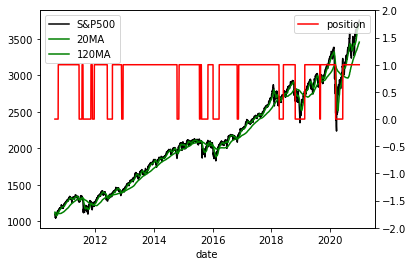

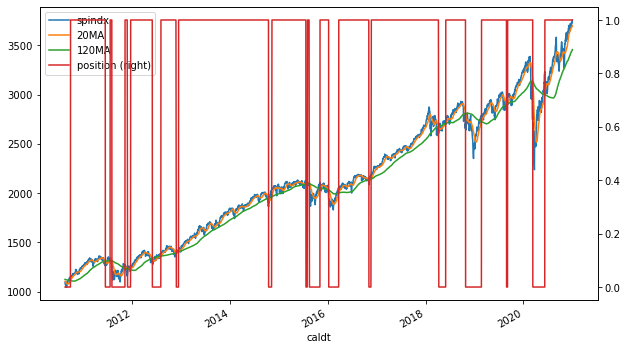

In [21]:
fix, ax1 = plt.subplots()   # creating the first y axis
plt.plot(sp500trading['spindx'], 'k', lw = 1.5, label = 'S&P500')
plt.plot(sp500trading['20MA'], 'g', lw = 1.5, label = '20MA')
plt.plot(sp500trading['120MA'], 'g', lw = 1.5, label = '120MA')
plt.legend(loc =0)
plt.xlabel('date')
ax2 = ax1.twinx()           # creating the second y axis
plt.plot(sp500trading['position'], 'r', lw = 1.5, label = 'position')
plt.legend(loc =0)
plt.ylim([-2, 2])
plt.show()

# simpler way
ax = sp500trading.plot(figsize=(10, 6), secondary_y='position')
ax.get_legend()

# Return on investment 

In [22]:
# let's compute investment return
sp500trading['rtn'] = sp500trading['spindx'].pct_change()
#sp500trading['rtn'] = sp500trading['spindx'].pct_change().shift(-2)
sp500trading['inv_rtn'] = sp500trading['rtn'] * sp500trading['position']
(sp500trading['inv_rtn'] + 1).prod() - 1


0.8839260645280944